In [10]:
from numpy import pi
from composipy import OrthotropicMaterial, LaminateProperty, PlateStructure
from time import time

# Case 4: Biaxial Load non balanced

In [11]:
E1 = 137.9e3
E2 = 11.7e3
v12 = 0.31
G12 = 4.82e3
t = 0.1524

a = 100
b = 100

Nxx = -1
Nyy = -0.5


m = 8
n = 8

ti = time()

mat = OrthotropicMaterial(E1, E2, v12, G12, t)
stack = [0] + [90]

stack += stack[::-1]
lam = LaminateProperty(stack, mat)
plate = PlateStructure(lam, a, b, "PINNED", Nxx=Nxx, Nyy=Nyy, m=m, n=n)

print(plate.buckling_analysis())
print(f'{time()-ti} seconds')

(array([2.20380454, 4.1779638 , 8.71194584, 8.81521853, 8.8321558 ]), array([[ 3.45579285e+00, -3.54949834e+00, -2.00699416e+00,
         3.45579420e+00,  2.70818771e+00],
       [-3.45579285e+00, -3.54949834e+00,  2.00699416e+00,
         3.45579420e+00, -2.70818771e+00],
       [ 1.86486853e+00,  7.99038138e-15, -1.08304530e+00,
        -5.80002344e-12, -5.85615510e+00],
       [-6.41138746e-13,  6.45782219e+00,  1.06712657e-12,
        -6.28734014e+00,  3.80654536e-12],
       [-1.40537046e-01,  5.45522350e-15,  8.16185017e-02,
         8.16649678e-12,  9.90669703e+00],
       [-7.91131752e-13, -1.22265084e+00,  2.41417584e-12,
         1.19037095e+00, -3.62238447e-12],
       [ 3.61054506e-03, -7.16769584e-14, -2.09583582e-03,
        -3.64735286e-12, -3.04837387e+00],
       [-5.55052110e-13,  9.26884056e-02,  1.55499456e-12,
        -9.01942715e-02, -2.01271232e-12],
       [-3.45579285e+00,  3.54949834e+00, -2.00699416e+00,
         3.45579420e+00, -2.70818771e+00],
       [ 3.4

In [12]:
lam.D

array([[2.32441542e+03, 6.90329968e+01, 2.16830180e-16],
       [6.90329968e+01, 5.22933991e+02, 1.81679904e-14],
       [2.16830180e-16, 1.81679904e-14, 9.09914670e+01]])

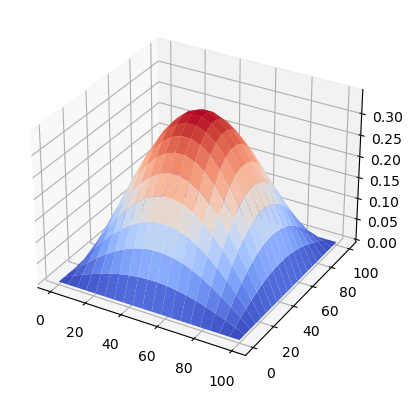

In [13]:
plate.plot_eigenvalue()

## Analytical check

In [6]:
D11 = lam.D[0,0]
D12 = lam.D[0,1]
D66 = lam.D[2,2]
D22 = lam.D[1,1]

In [9]:
critc_buckling = pi**2 * (D11 + 2*(D12+2*D66) + D22) / (100**2*(1+0.5))
critc_buckling

2.2038045440605614